In [19]:
import json
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import seaborn as sns

**Loading data from CSV to Pandas Dataframe**

In [20]:
df= pd.read_csv('../input/exploratory-data-analysis/eda.csv')
df.head()

title  score      id  \
0     Heera Gold Timeline #1 - Background - Pre 2007      1  abdhdg   
1                         Some anniversaries in 2019      1  abdjri   
2                                      Fire Crackers      1  abe29k   
3    [NP] PSA: Get vaccinated for rabies if you can.      1  abe9l1   
4  [AskIndia] Job prospects for a returning NRI t...      1  abeqwk   

                                                 url     created  \
0  https://www.reddit.com/r/india/comments/abdhdg...  1546305048   
1  https://www.reddit.com/r/india/comments/abdjri...  1546305528   
2  https://www.reddit.com/r/india/comments/abe29k...  1546309545   
3  https://www.reddit.com/r/india/comments/abe9l1...  1546311287   
4  https://www.reddit.com/r/india/comments/abeqwk...  1546315378   

                                                body            author  \
0  Background – Pre 2007\n\nBefore anything, Nowh...            YSayed   
1  150 year ago:\n\nBirth of Mahatma Gandhi\n\nDe...       SlightKnife   
2  I am completely against use of fire crackers b...         ronakgoel   
3  There's been a global shortage of human and eq...  dangling_asshole   
4  Hello,   \n\nI have been working in the US as ...             tafun   

              flair  num_of_comments  
0  Business/Finance                0  
1     Non-Political                3  
2     Non-Political                5  
3     Non-Political               15  
4          AskIndia                4

**Number of Posts per Flair**

In [21]:

count = df['flair'].value_counts()
plt.figure(figsize=(20,4))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title("No of occurances of each flair from Jan 2019 to April 2020 exlcuding posts whose content was removed or deleted or do not have an assigned flair")
plt.ylabel('Number of Occurrences')
plt.xlabel('Flair')



Text(0.5, 0, 'Flair')

**Distribution of Title length and Number of Posts**

Text(0, 0.5, 'Number of posts')

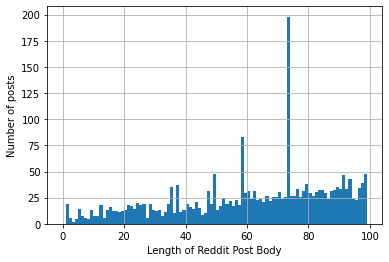

In [22]:
length = df.body.str.len()
length.hist(bins = np.arange(0,100,1))
plt.xlabel("Length of Reddit Post Body")
plt.ylabel("Number of posts")

Distribution of Title length and Number of Posts

Text(0, 0.5, 'Number of posts')

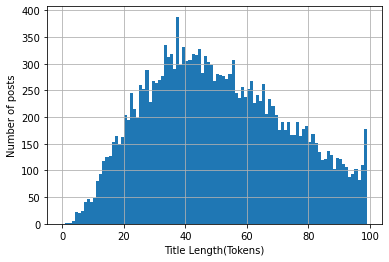

In [23]:
length = df.title.str.len()
length.hist(bins = np.arange(0,100,1))
plt.xlabel("Title Length(Tokens)")
plt.ylabel("Number of posts")

> **Distribution of Number of Comments and Number of Posts**

In [28]:
comments = df.num_of_comments
comments.hist(bins = np.arange(0,50,1))
plt.xlabel("Number of Comments")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

**Distribution of Upvotes and Number of Posts**

Text(0, 0.5, 'Number of posts')

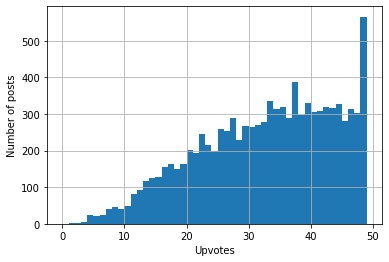

In [29]:
score = df.score
temp.hist(bins = np.arange(0,50,1))
plt.xlabel("Upvotes")
plt.ylabel("Number of posts")

**Number of Comments vs Score**

flair
AskIndia              AxesSubplot(0.125,0.125;0.775x0.755)
Business/Finance      AxesSubplot(0.125,0.125;0.775x0.755)
Coronavirus           AxesSubplot(0.125,0.125;0.775x0.755)
Food                  AxesSubplot(0.125,0.125;0.775x0.755)
Non-Political         AxesSubplot(0.125,0.125;0.775x0.755)
Photography           AxesSubplot(0.125,0.125;0.775x0.755)
Policy/Economy        AxesSubplot(0.125,0.125;0.775x0.755)
Politics              AxesSubplot(0.125,0.125;0.775x0.755)
Scheduled             AxesSubplot(0.125,0.125;0.775x0.755)
Science/Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Sports                AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

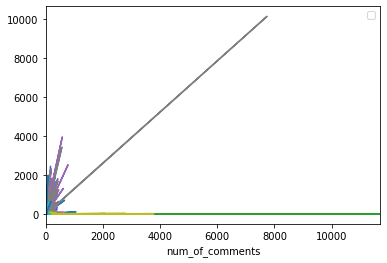

In [30]:
fig, ax = plt.subplots()
plt.legend()
df.groupby('flair').plot(x='num_of_comments', y='score',  ax=ax, legend=False)

**Average Score per Flair**

In [31]:

df2 = df.groupby("flair").mean()[['score']]
df2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Score per flair")
plt.xlabel("Flair")
plt.ylabel("Average Score per post")


Text(0, 0.5, 'Average Score per post')

**Word Cloud**

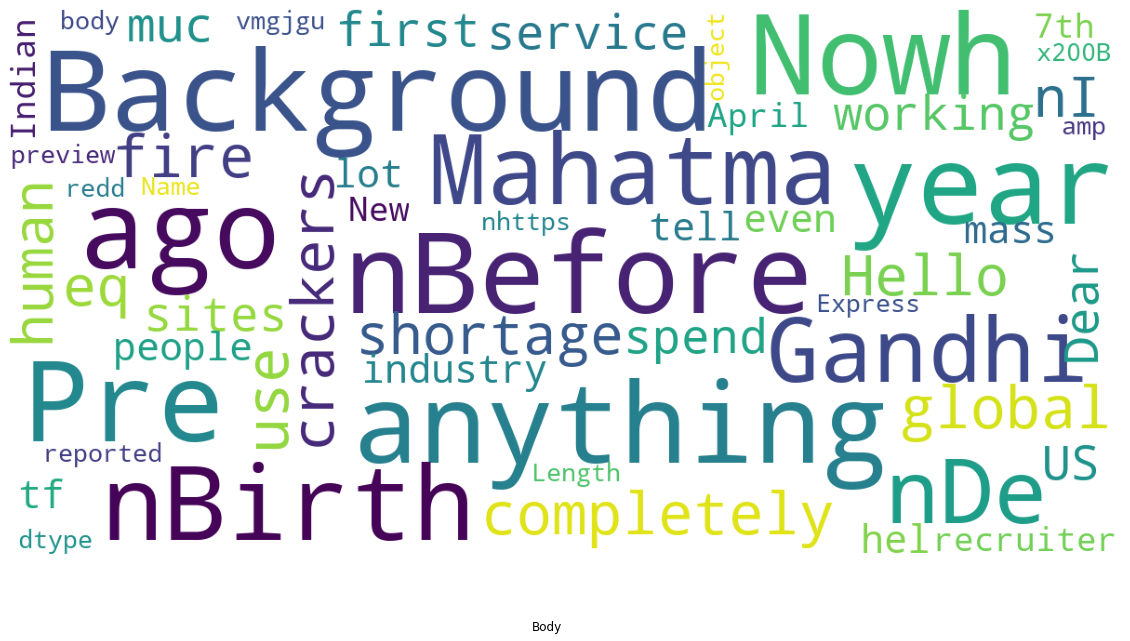

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=1000,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.body,"Body")

**Word Cloud for each Flair**

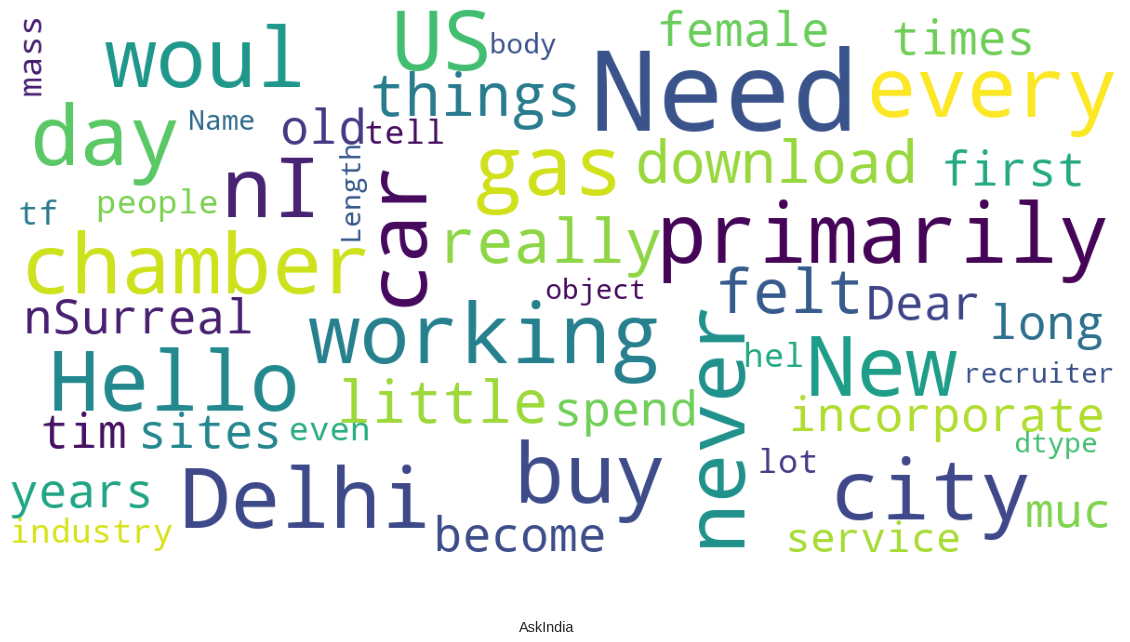

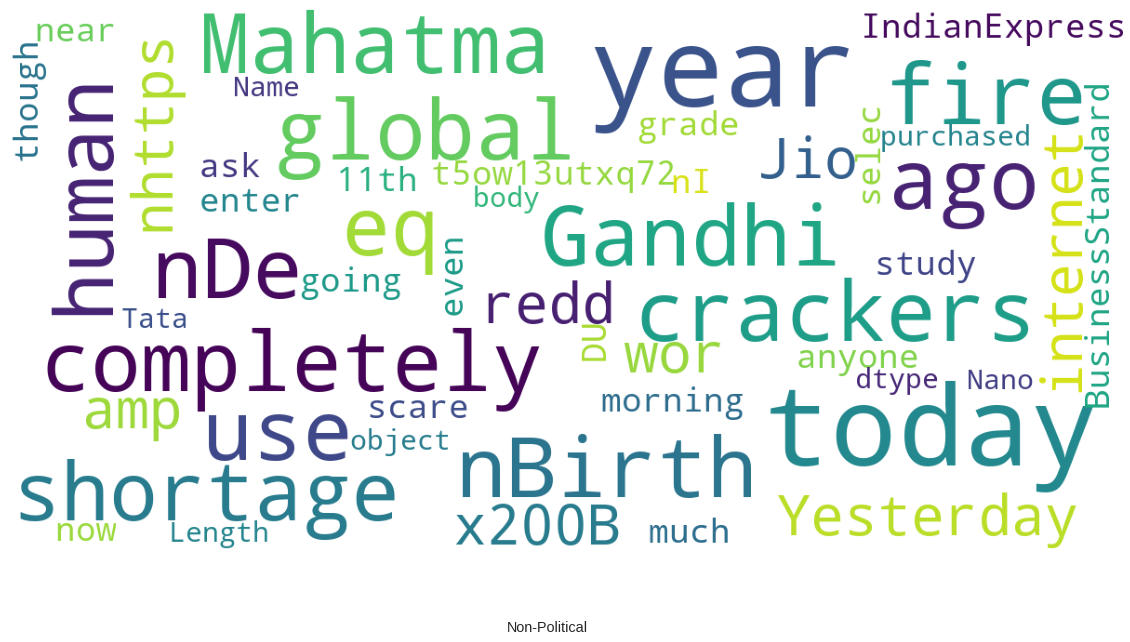

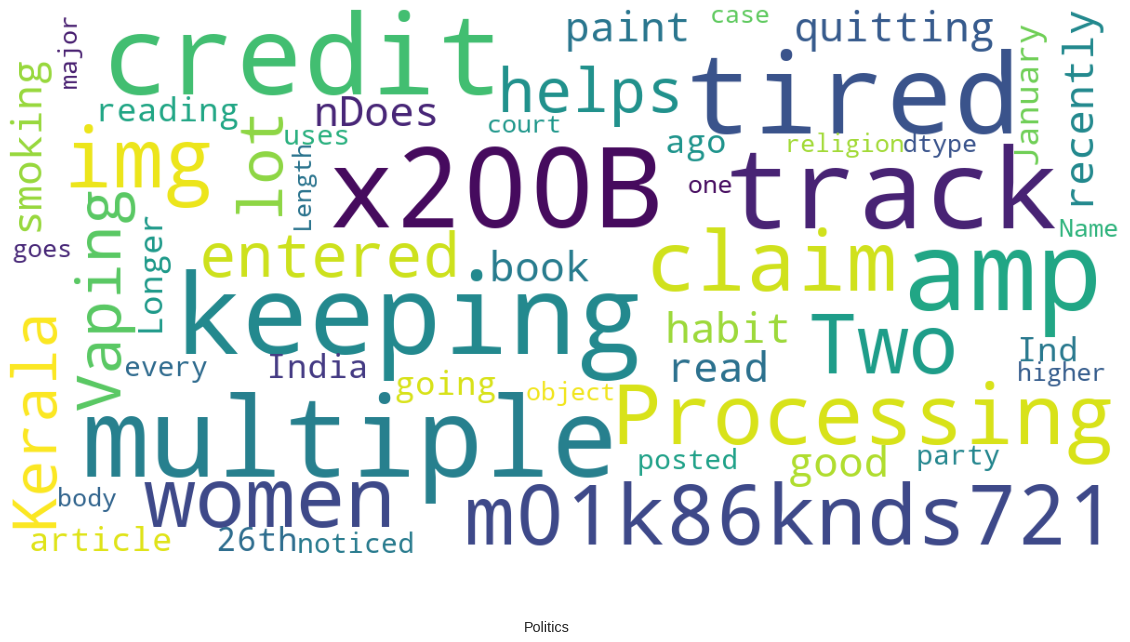

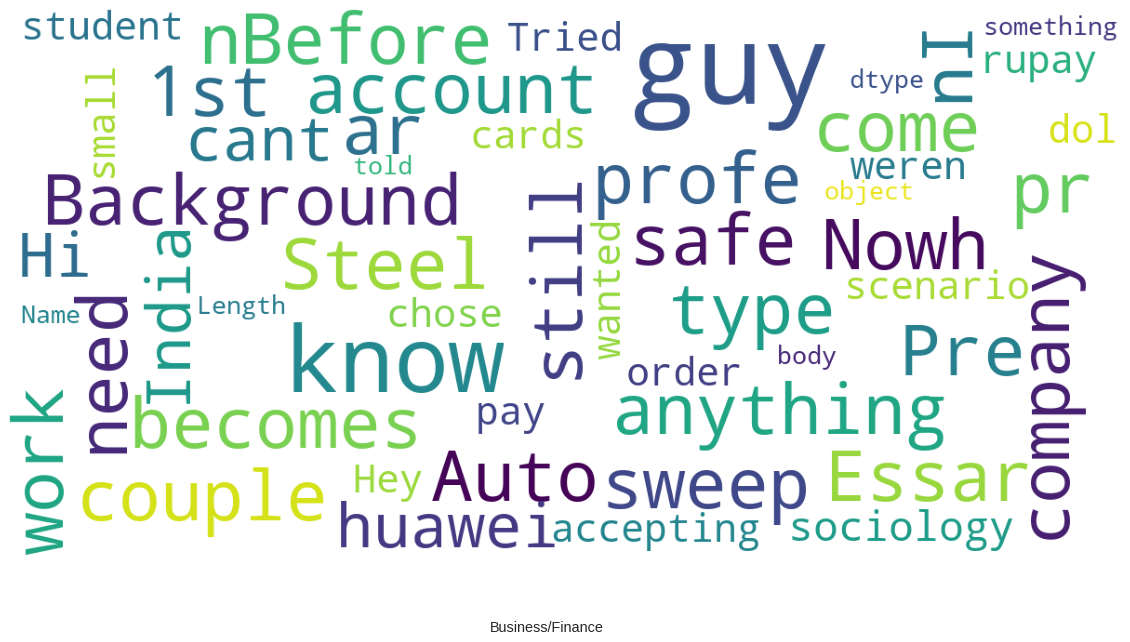

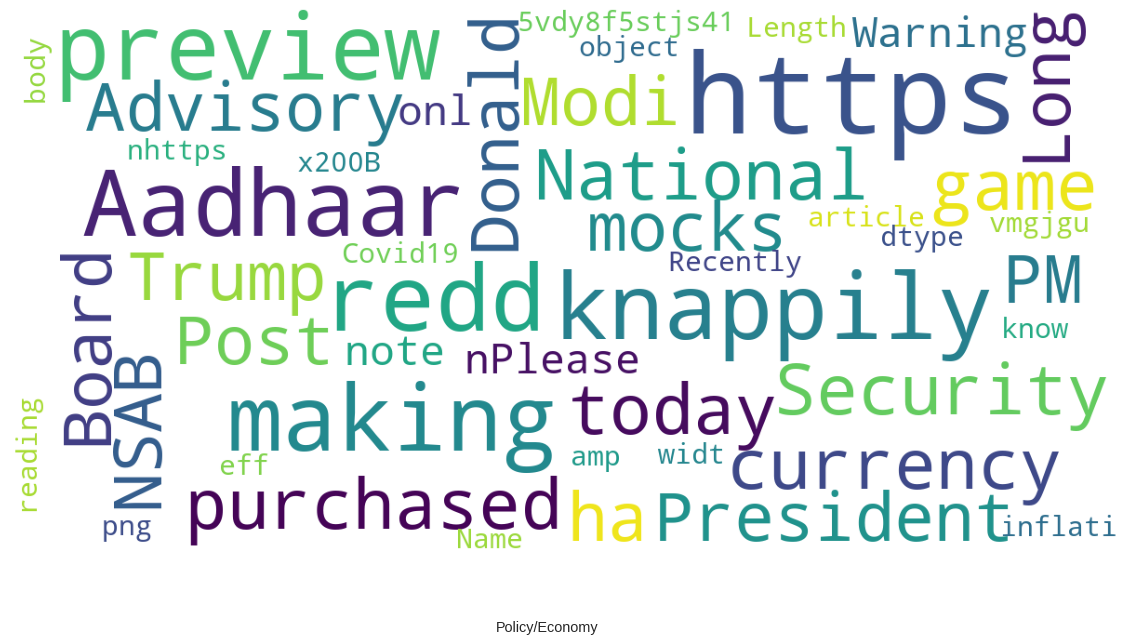

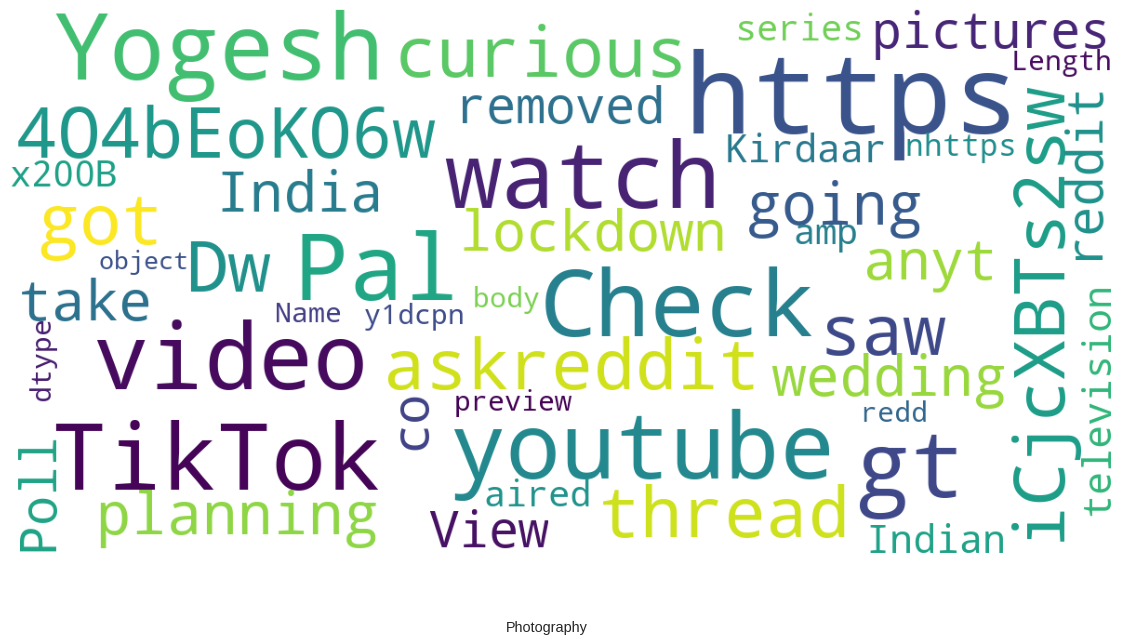

In [37]:

flairs = ["AskIndia", "Non-Political", "Science/Technology", "Coronavirus","Politics", "Business/Finance", "Policy/Economy","Sports", "Food","Photography","Scheduled"]
for flair in flairs:
    show_wordcloud(df[df['flair'] == flair]['body'],flair)

**TSNE Visualize**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.body)
y = df.flair

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
